A project investigating indicators of the quality of life of human beings round the globe.

Four indicators have been chosen and any relationship between them investigated.

The questions to be answered are:

1. Is there any correlation or relationship between the global mean income per person (adjusted for inflation), the mean life expectancy, and the mean fertility rate?
2. Is the rate of primary school completiona a good predictor for literacy in adult life?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data wrangling!

Three datasets have been selected: the mean life expectancy per country, the fertility rate per country, and the mean income per person (having accounted for differences in GDP). 

The first goal is to get some information on each dataset and how they fit together, what they have in common, and what may need to be cleaned.

All datasets were obtained from Gapminder.org on 18/10/2021.

Fertility rate data: http://gapm.io/dtfr
Life expectancy data: http://gapm.io/ilex
Income per capita data: http://gapm.io/dgdppc Gapminder based on World Bank, A. Maddison

The pandas documentation and stackoverflow were consulted frequently for help with code.

In [2]:
life_expectancy_years = pd.read_csv('life_expectancy_years.csv')
life_expectancy_years.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [3]:
life_expectancy_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [4]:
life_expectancy_years.describe()

,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,31.503763,31.463441,31.480108,31.385484,31.460753,31.586559,31.644086,31.598387,31.385484,31.313441,...,83.361828,83.476344,83.600538,83.717742,83.838172,83.955376,84.076344,84.193548,84.312903,84.430645
std,3.809510,3.801217,3.932344,3.955872,3.928388,4.003874,4.102694,3.974506,4.080230,4.033412,...,5.803782,5.797854,5.788922,5.777904,5.770755,5.766333,5.756555,5.750616,5.743805,5.741341
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,66.400000,66.500000,66.700000,66.800000,66.900000,67.000000,67.100000,67.200000,67.300000,67.400000
25%,29.025000,28.925000,28.900000,28.900000,28.925000,29.025000,29.025000,29.025000,28.925000,28.825000,...,79.650000,79.750000,79.925000,80.025000,80.150000,80.325000,80.425000,80.525000,80.700000,80.800000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.000000,84.100000,84.250000,84.300000,84.500000,84.600000,84.700000,84.800000,84.900000,85.000000
75%,33.875000,33.900000,33.875000,33.675000,33.775000,33.875000,33.975000,33.975000,33.775000,33.675000,...,87.775000,87.875000,87.975000,88.075000,88.175000,88.300000,88.400000,88.500000,88.675000,88.775000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.400000,93.500000,93.600000,93.700000,93.800000,94.000000,94.100000,94.200000,94.300000,94.400000


In [5]:
np.any(life_expectancy_years.isnull())

True

In [6]:
life_expectancy_years.shape

(195, 302)

In [7]:
life_expectancy_years.isnull().sum()

country    0
1799       9
1800       9
1801       9
1802       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

As there are only 9 missing values per column and 195 x 302 pieces of data, it is enough to replace each with the mean life expectancy. 

In [8]:
mean_life = life_expectancy_years.mean()
life_expectancy_years = life_expectancy_years.fillna(mean_life)

Checking that the missing values have been replaced:

In [9]:
life_expectancy_years.isnull().sum()

country    0
1799       0
1800       0
1801       0
1802       0
          ..
2096       0
2097       0
2098       0
2099       0
2100       0
Length: 302, dtype: int64

The next stage is very similar but applied to two other variables:

In [10]:
children_per_woman = pd.read_csv('children_per_woman_total_fertility.csv')
children_per_woman.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02


In [11]:
np.any(children_per_woman.isnull().sum())

True

In [12]:
mean_fertility = children_per_woman.mean()
children_per_woman = children_per_woman.fillna(mean_fertility)
np.any(children_per_woman.isnull().sum())

False

In [13]:
income_gdp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income_gdp.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,...,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,...,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
3,Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,...,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
4,United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,...,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k


Checking for duplicates and regathering info so can make a decision about how to merge the files:

In [14]:
np.any(income_gdp.isnull().sum())

False

In [15]:
np.any(income_gdp.duplicated())

False

In [16]:
np.any(children_per_woman.duplicated())

False

In [17]:
np.any(life_expectancy_years.duplicated())

False

There are no duplicated rows!

Now it is time to gather information again and work out how to merge the files.

In [18]:
income_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(103), object(149)
memory usage: 384.0+ KB


In [19]:
life_expectancy_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [20]:
children_per_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 476.7+ KB


The columns do not appear to match. Let us look in more detail:

In [21]:
children_per_woman.columns

Index(['country', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=302)

In [22]:
income_gdp.columns

Index(['country', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807',
       ...
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050'],
      dtype='object', length=252)

In [23]:
life_expectancy_years.columns

Index(['country', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=302)

The years for which all three datasets overlap are the years 1799-2050. Therefore the datasets will be joined on those years.

Cutting the last 50 years from two of them does the job.

In [24]:
life_expectancy_years = life_expectancy_years.drop(life_expectancy_years.loc[:, '2051':].columns, axis=1)

In [25]:
children_per_woman = children_per_woman.drop(children_per_woman.loc[:, '2051':].columns, axis=1)

Checking the right columns have been dropped:

In [26]:
children_per_woman.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.79,1.79,1.79,1.79,1.79,1.80,1.80,1.80,1.80,1.80
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,2.41,2.37,2.34,2.30,2.27,2.24,2.21,2.18,2.15,2.13
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,4.12,4.07,4.02,3.97,3.92,3.87,3.82,3.77,3.73,3.69
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.70,1.70,1.71,1.71,1.71,1.71,1.71,1.71,1.71,1.72
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,1.83,1.83,1.84,1.84,1.85,1.85,1.85,1.86,1.86,1.87


In [27]:
life_expectancy_years.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,28.200000,28.200000,28.200000,28.200000,28.200000,28.200000,28.100000,28.100000,28.100000,...,68.600000,68.800000,68.900000,69.100000,69.200000,69.400000,69.500000,69.700000,69.800000,70.000000
1,Angola,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,71.400000,71.600000,71.800000,72.000000,72.200000,72.400000,72.500000,72.700000,72.900000,73.100000
2,Albania,35.400000,35.400000,35.400000,35.400000,35.400000,35.400000,35.400000,35.400000,35.400000,...,81.600000,81.800000,81.900000,82.000000,82.200000,82.300000,82.400000,82.600000,82.700000,82.800000
3,Andorra,31.503763,31.463441,31.480108,31.385484,31.460753,31.586559,31.644086,31.598387,31.385484,...,76.743011,76.901613,77.045699,77.201075,77.347312,77.497312,77.643011,77.795161,77.932796,78.075269
4,United Arab Emirates,30.700000,30.700000,30.700000,30.700000,30.700000,30.700000,30.700000,30.700000,30.700000,...,76.800000,77.000000,77.100000,77.200000,77.300000,77.500000,77.600000,77.700000,77.900000,78.000000


Now exploring the data!

Initially, it seemed that merging the datasets might be a good idea. However, this will only create a very large dataset in three sections. It seems better to explore each dataset individually first and then compare them afterwards.

Beginning with life_expectancy_years, we can begin to visualize the dataset for various countries.

To make the visualization easier, the mean value for each year will be plotted against time (in years) in order to see any basic trends:

In [28]:
life_expectancy_mean = life_expectancy_years.mean()
years = life_expectancy_years.columns

Dropping the first column value ('country') as this is not a year!

In [29]:
years = years[1:]

In [30]:
years

Index(['1799', '1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807',
       '1808',
       ...
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050'],
      dtype='object', length=251)

Creating a plot function which will speed up the coding:

In [31]:
def plot(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

Now ready to plot!

The years will not show well if they are plotted as strings because they will be treated as a discrete variable. 

This issue can be rectified by converting the years to floats:

In [32]:
years = years.astype(float)

The first type of visualization to be performed is a 1-D visualization of each of the three variables to be investigated:

1. Mean Global Life Expectancy
2. Mean Fertility Rate
3. Mean Income Per Capita (Adjusted for Inflation)

These were visualized as histograms so that the distributions (over the entire time period the data was taken!) can be observed. This will give an idea of what counts as a very high, very low or typical value for each variable over the years since 1799.

<AxesSubplot:title={'center':'Distribution of Life Expectancy (Years) since 1799'}, ylabel='Frequency'>

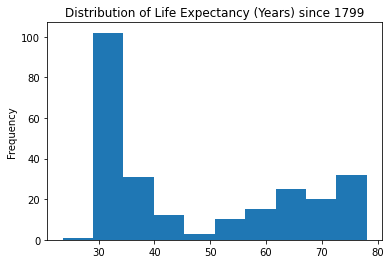

In [89]:
life_expectancy_mean.plot.hist(title='Distribution of Life Expectancy (Years) since 1799',xlabel='Life Expectancy',ylabel='Frequency Density')

Observations:

1. The life expectancies cluster around the bin 30-35 years old. They also appear to cluster in the region 65-78 years old. This is interesting behaviour as there may be no middle ground. 
2. Furthermore, it indicates that standard deviation and mean are not good statistics to represent this data.

<AxesSubplot:title={'center':'Distribution of Fertility Rate since 1799'}, ylabel='Frequency'>

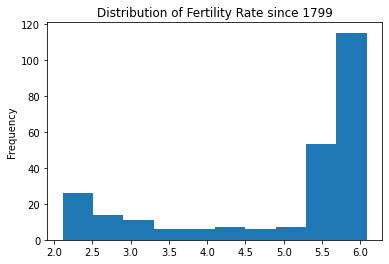

In [88]:
children_per_woman_mean.plot.hist(title='Distribution of Fertility Rate since 1799',xlabel='Fertility Rate',ylabel='Frequency Density')

Observations:

1. The fertlity rate clusters around the region 5.75-6.0 children per woman. 
2. Again, mean and standard deviation are clearly not representative statistics for this dataset.

The final variable to be visualized is the mean income per capita, but this is left until later on in the analysis as the first two variables and any relationship between them must be investigated first.

Let's now look at how the variables just visualized compare to each other:

No handles with labels found to put in legend.


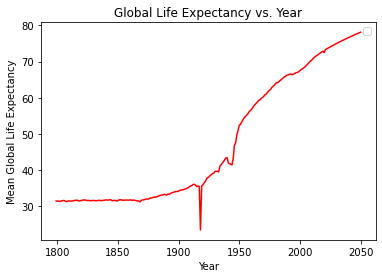

In [33]:
plt.plot(years, life_expectancy_mean, color='r')
plot('Year', 'Mean Global Life Expectancy', 'Global Life Expectancy vs. Year')

And now both axes reflect what are (for our purposes) continuous values!

Observations:

- There is a significant dip in life expectancy around the time of the world wars. This would make sense as so many people died.
- There appears to be a dip around 1950 - the cause of this is not clear.
- No moving averages are necessary as the line chart is already smooth and lacks noise.

Now we can compare the mean global life expectancy with the other two indicators:

In [34]:
income_gdp_mean = income_gdp.mean()
children_per_woman_mean = children_per_woman.mean()

No handles with labels found to put in legend.


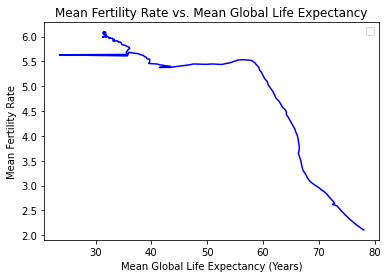

In [35]:
plt.plot(life_expectancy_mean, children_per_woman_mean, color='b')
plot('Mean Global Life Expectancy (Years)', 'Mean Fertility Rate', 'Mean Fertility Rate vs. Mean Global Life Expectancy')

There is a strange shape in the left-hand region of the graph. Duplicated rows were dropped earlier so this is not the cause.

Plotting a scatter graph so the individual datapoints can be seen clearly:

No handles with labels found to put in legend.


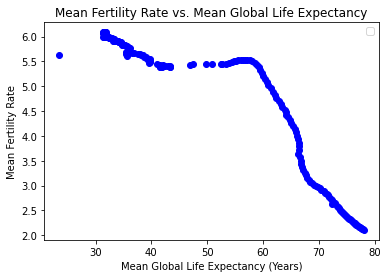

In [36]:
plt.scatter(life_expectancy_mean, children_per_woman_mean, color='b')
plot('Mean Global Life Expectancy (Years)', 'Mean Fertility Rate', 'Mean Fertility Rate vs. Mean Global Life Expectancy')

The cause is now clear! The line chart attempted to join an apparent anomaly with the rest of the data.

Observations:

- The relationship between these two variables is non-linear
- However, there is a clear trend after life expectancy = 60 that the fertility rate drops with increasing life expectancy.
- For the global life expectancy in the range 40-60 years, there appears to be very little correlation.
- For the global life expectancy less than around 40 years, there appears to be a weak negative correlation.
- The datapoint which appears to be an anomaly may well be the result of the wars and may not be an anomaly at all, so it will be left in the datasets


A question that arises from this is whether the fertility rate changed significantly over the same decade as the mean global life expectancy. To see whether this is true we can plot the following:

No handles with labels found to put in legend.


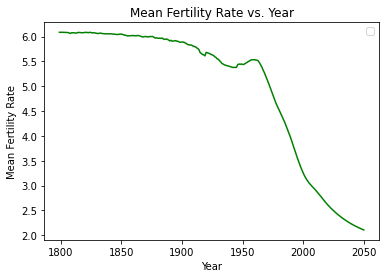

In [37]:
plt.plot(years, children_per_woman_mean, color='g')
plot('Year', 'Mean Fertility Rate', 'Mean Fertility Rate vs. Year')

Here the fertility rate seems to have dropped significantly after around the year 1960.

It appears that the drop in fertility rate lags about 20-30 years behind the sudden increase in mean global life expectancy. This suggests that there was roughly a full generation between the two events. 

This is quite important to investigate as:
- it appeared that fertility rate and mean global life expectancy are only very strongly correlated for the age range 60+
- confirming the lag shows a more complex relationship
- there may be a 'tipping point' where fertility rate suddenly dips.

However we should investigate this statistically first.

Plotting the changes in both indicators:

In [38]:
change_in_life_expectancy = np.diff(life_expectancy_mean)

In [39]:
change_in_children_per_woman = np.diff(children_per_woman_mean)

In [40]:
years2 = years[1:]

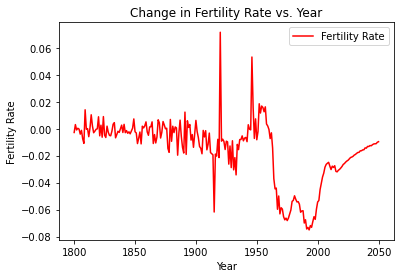

In [41]:
plt.plot(years2, change_in_children_per_woman, color='r',label='Fertility Rate')
plot('Year','Fertility Rate','Change in Fertility Rate vs. Year')

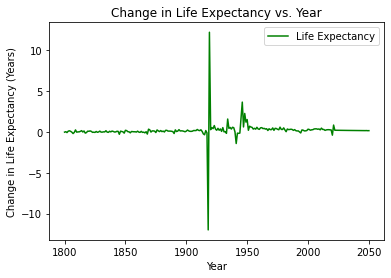

In [42]:
plt.plot(years2, change_in_life_expectancy, color='g', label='Life Expectancy')
plot('Year','Change in Life Expectancy (Years)','Change in Life Expectancy vs. Year')

And now plotting them on the same graph so that they can be compared:

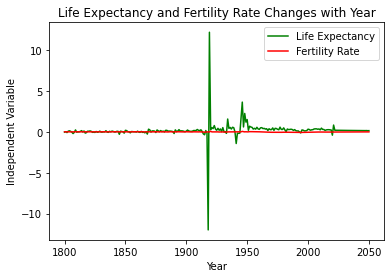

In [43]:
plt.plot(years2, change_in_life_expectancy, color='g', label='Life Expectancy')
plt.plot(years2, change_in_children_per_woman, color='r',label='Fertility Rate')
plot('Year','Independent Variable','Life Expectancy and Fertility Rate Changes with Year')


Some observations:

- the changes in the two variables are not easy to see when directly compared.
- However when the change in fertility rate is plotted then it is easy to see the changes
- Comparing the two individual plots we can see that the spikes follow each other quite closely - this is the lag which was spotted earlier
- It may be that there is a link, but that fertility rate is more sensitive?

<AxesSubplot:title={'center':'% Change in Fertility Rate vs. Year'}, xlabel='Year', ylabel='% Change in Fertility Rate'>

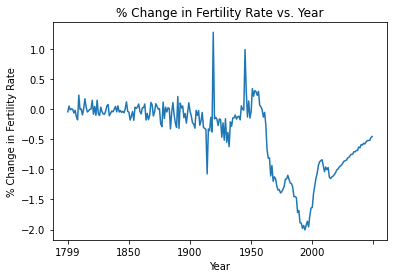

In [44]:
percent_fertility = change_in_children_per_woman/children_per_woman_mean[:-1]
percent_fertility = 100*percent_fertility
percent_fertility.plot(title='% Change in Fertility Rate vs. Year', xlabel='Year',ylabel='% Change in Fertility Rate')

Here we need to smooth out the graph using a 10-year moving average:

<AxesSubplot:title={'center':'% Change in Fertility vs. Year'}, xlabel='Year', ylabel='% Change'>

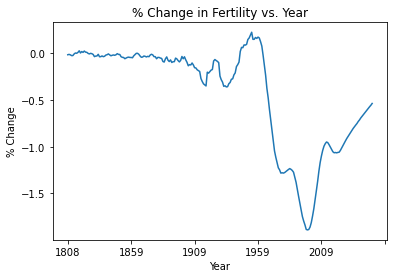

In [45]:
percent_fertility_moving_av = pd.Series(percent_fertility).rolling(window=10).mean().iloc[9:]
percent_fertility_moving_av.plot(title='% Change in Fertility vs. Year', xlabel='Year',ylabel='% Change')

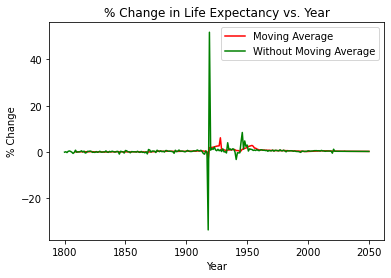

In [46]:
percent_life_expectancy = change_in_life_expectancy/life_expectancy_mean[:-1]
percent_life_expectancy = percent_life_expectancy*100
percent_life_expectancy_moving_av = pd.Series(percent_life_expectancy).rolling(window=10).mean().iloc[9:]
plt.plot(years2[9:], percent_life_expectancy_moving_av,color='r', label='Moving Average')
plt.plot(years2, percent_life_expectancy, color='g', label='Without Moving Average')
plot('Year','% Change','% Change in Life Expectancy vs. Year')

Now plotting the moving-averaged indicators against each other to observe if there is a time lag:

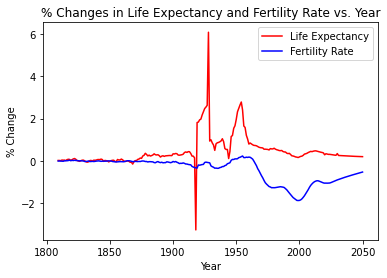

In [47]:
plt.plot(years2[9:], percent_life_expectancy_moving_av,color='r', label='Life Expectancy')
plt.plot(years2[9:], percent_fertility_moving_av,color='b', label='Fertility Rate')

plot('Year','% Change','% Changes in Life Expectancy and Fertility Rate vs. Year')

Hence it seems that the fertility rate may possibly follow the life expectancy, but the dependency is not well established. Some regions of the graph do not follow each other very closely - in particular, the fertility rate did not respond as drastically to the events of 1920-1930 as the life expectancy.

What we can conclude is that neither would be a good predictor of the other, apart from the year 1960 onwards.

For the time period 1960-2050, there appears to be a correlation (see earlier graph). The correlation was calculated:

No handles with labels found to put in legend.


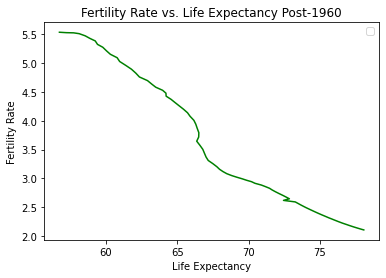

In [48]:
modern_life_expectancy = life_expectancy_mean['1960':]
modern_children_per_woman = children_per_woman_mean['1960':]
plt.plot(modern_life_expectancy, modern_children_per_woman, color='g')

plot('Life Expectancy','Fertility Rate','Fertility Rate vs. Life Expectancy Post-1960')

There appears to be a strong correlation again. Calculating this:

In [49]:
corr1 = np.corrcoef(modern_life_expectancy,modern_children_per_woman)
corr1

array([[ 1.        , -0.98178081],
       [-0.98178081,  1.        ]])

This is a very low negative correlation of -0.982. This shows a possible strong dependency!

However, this is only true for high life expectancy. It is very likely only applicable after a 'tipping point' in life expectancy has been reached - it seems from this analysis that the tipping point is around 60 years.

INVESTIGATING OTHER VARIABLES:

The next part of this analysis focuses on any relationship between the following variables:

- Mean global income per person, adjusted for GDP
- Mean global fertility rate
- Mean global life expectancy

First, graphs were plotted for each:

Income_gdp contains a lot of data in the form 210k instead of 210000 dollars, for example. This had to be converted to numbers to make sense of the data.

In [50]:
income_gdp.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,...,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,...,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
3,Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,...,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
4,United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,...,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k


In [51]:
income_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(103), object(149)
memory usage: 384.0+ KB


What kind of objects are the objects?

In [52]:
type(income_gdp['1799'][109])

numpy.int64

In [53]:
copy = income_gdp.copy() # For data cleaning purposes

In [54]:
income_gdp.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,...,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,...,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
3,Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,...,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
4,United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,...,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k


In [55]:
income_gdp['2044'] = income_gdp['2044'].str.replace('k','').astype(float)*1000

In [56]:
income_gdp['2044']

0      3070000.0
1      8570000.0
2        26100.0
3       116000.0
4        79300.0
         ...    
190    8770000.0
191    4240000.0
192      15500.0
193    3760000.0
194    3720000.0
Name: 2044, Length: 195, dtype: float64

This method multiplies every value by 1000, which is not what we want.

Replacing the values containing k with a string '000':

In [57]:
income_gdp['1799'].replace({"K":"*1e3", "M":"*1e6", "k":"*1e3"}, regex=True).map(pd.eval).astype(float)

0       674.0
1       691.0
2       746.0
3      1340.0
4      1120.0
        ...  
190    1570.0
191     981.0
192    1760.0
193     741.0
194     972.0
Name: 1799, Length: 195, dtype: float64

In [58]:
for column in income_gdp.columns[1:]:
    income_gdp[column] = income_gdp[column].replace({"K":"*1e3", "M":"*1e6", "k":"*1e3"}, regex=True).map(pd.eval).astype(float)

In [59]:
income_gdp.head() # Quick check

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,674.0,674.0,674.0,674.0,674.0,674.0,674.0,674.0,674.0,...,2880.0,2940.0,3000.0,3070000.0,3130.0,3200.0,3270.0,3340.0,3410.0,3480.0
1,Angola,691.0,693.0,697.0,700.0,702.0,705.0,709.0,712.0,716.0,...,8040.0,8220.0,8390.0,8570000.0,8750.0,8940.0,9120.0,9320.0,9520.0,9720.0
2,Albania,746.0,746.0,746.0,746.0,746.0,747.0,747.0,747.0,747.0,...,24500.0,25000.0,25500.0,26100.0,26600.0,27200.0,27800.0,28300.0,28900.0,29600.0
3,Andorra,1340.0,1340.0,1340.0,1350.0,1350.0,1350.0,1350.0,1360.0,1360.0,...,108000.0,111000.0,113000.0,116000.0,118000.0,121000.0,123000.0,126000.0,128000.0,131000.0
4,United Arab Emirates,1120.0,1120.0,1120.0,1130.0,1130.0,1140.0,1140.0,1150.0,1150.0,...,74500.0,76100.0,77700.0,79300.0,81000.0,82700.0,84500.0,86300.0,88100.0,90000.0


Now finding the mean income per year and visualizing this over time:

<AxesSubplot:title={'center':'Income vs. Year'}, xlabel='Year', ylabel='Income (Dollars)'>

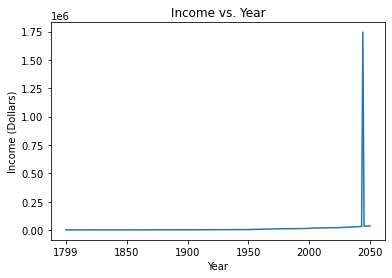

In [60]:
income_mean = income_gdp.mean()
income_mean.plot(title='Income vs. Year',xlabel='Year',ylabel='Income (Dollars)')

This tells us little other than that the income overall increased and is projected to boom in the mid-2000s.
Plotting the changes in income over the same time period also shows little more than this:

No handles with labels found to put in legend.


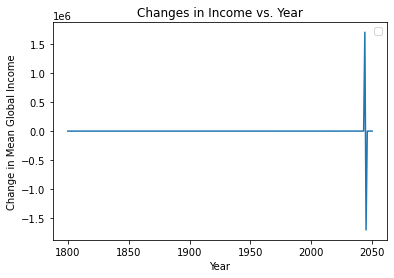

In [61]:
changes_income = np.diff(income_mean)
plt.plot(years2,changes_income)
plot('Year', 'Change in Mean Global Income','Changes in Income vs. Year')

It is difficult to see a trend here.
To get a proper idea of the mean income distribution, a histogram was plotted:

<AxesSubplot:title={'center':'Distribution of Mean Income per Capita since 1799'}, ylabel='Frequency'>

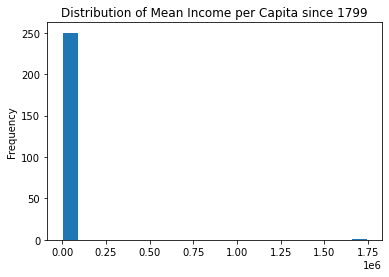

In [92]:
income_mean.plot.hist(bins=20,title='Distribution of Mean Income per Capita since 1799',ylabel='Frequency Density')

Observations:
1. There is no middle ground in income.
2. A distribution as skewed as this is unlikely to correlate well with either of the variables explored earlier in the analysis.
2. This is an apparent pattern - to investigate it further, we would need to plot the income distribution for smaller time periods and observe whether this pattern is still prevalent. However, this goes beyond the scope of this project.

Now we can check if there is a relationship between mean income, mean fertility rate and mean life expectancy over the given time period:

No handles with labels found to put in legend.


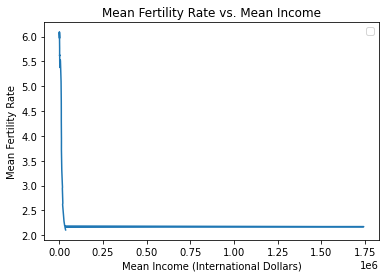

In [62]:
plt.plot(income_mean, children_per_woman_mean)
plot('Mean Income (International Dollars)', 'Mean Fertility Rate','Mean Fertility Rate vs. Mean Income')

No handles with labels found to put in legend.


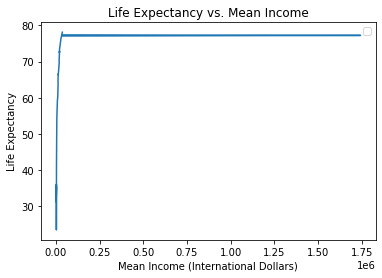

In [63]:
plt.plot(income_mean, life_expectancy_mean)
plot('Mean Income (International Dollars)', 'Life Expectancy','Life Expectancy vs. Mean Income')

Observations:

It appears there is very little correlation between mean life expectancy and mean income.
However there is a huge spike in income after the 2000s.

SUMMARY OF SECTION ONE:

Conclusions.
1. There is very little apparent correlation between mean global income and the other two variables investigated, mean global life expectancy and mean fertility rate. This was clear from the plots. 

2. There is a very strong correlation between fertility rate and global life expectancy once the life expectancy exceeds 60 years. This suggests social behaviour drastically changes once a society reaches the level of prosperity required for most members to survive beyond 60. The correlation coefficient was calculated and found to be <-.90, which is a very strong negative correlation.

Limitations of the analysis in Section One:

1. Neither the mean nor the standard deviation are representative statistics of the variables. The skewedness of the distributions of all the variables shows this. 
2. The relationship between global life expectancy and fertility rate is only well-established for high life expectancies - for lower, no relationship has been established.
3. The reliability of the data is skewed in favour of wealthier nations. It is also skewed in favour of the more recent data. This means that trends observed may not actually hold because the sample is biased.
4. In particular, income data may be unreliable as it is adjusted for inflation. It is difficult to adjust for inflation when the data was collected two hundred years ago.
5. The analysis could be more statistical. 

Regarding limitation 3, an improvement to the analysis would be to choose five Third World nations, five Second World and five First World nations, and compare the distributions over time.

SECTION TWO:

Investigating three indicators by country

In this section the following question is investigated:

1. Is primary school completion a good predictor of adult literacy?

For this analysis data was used from wwww.gapminder.org, cc-by license.

Primary school completion source: https://data.worldbank.org/indicator/SE.PRM.CMPT.ZS
Literacy rate source: Gapminder.org

In [64]:
#Importing the data

primary_completion = pd.read_csv('C:/Users/joelh/Downloads/Primary Completion Rate.csv')

In [65]:
literacy_rate_adult = pd.read_csv('C:/Users/joelh/Downloads/literacy_rate_adult.csv')

In [66]:
primary_completion.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,96.6,101.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,16.7,NaN,NaN,17.9,19.7,...,NaN,NaN,NaN,NaN,NaN,80.5,84.4,85.6,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,98.7,89.5,101.0,98.9,99.9,102.0,102.0,103.0,NaN
4,United Arab Emirates,NaN,NaN,NaN,NaN,39.5,41.7,49.5,56.8,60.7,...,NaN,93.9,95.7,99.1,104.0,NaN,NaN,NaN,NaN,NaN


In [67]:
primary_completion['2011'].isnull().sum()

66

In [68]:
primary_completion['2011']

0        NaN
1        NaN
2       46.2
3       93.0
4        NaN
       ...  
191    106.0
192      NaN
193      NaN
194      NaN
195      NaN
Name: 2011, Length: 196, dtype: float64

This shows there are too many nan values for an analysis of one year to be worthwhile.

Instead the mean was calculated for each country:

In [69]:
primary_mean = primary_completion.mean(axis=1)
primary_mean.isnull().sum()

0

As can be seen, there are no nan values in this series now.

Examining the literacy rate:

In [70]:
literacy_rate_adult.head()

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.8,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.4
3,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,95.9,NaN,NaN,96.8


In [71]:
literacy_mean = literacy_rate_adult.mean(axis=1)
literacy_mean

0      97.050000
1      28.600000
2      68.900000
3      95.400000
4      97.133333
         ...    
151    98.400000
152    52.400000
153    85.075000
154    65.900000
155    81.633333
Length: 156, dtype: float64

In [72]:
countriesliteracy = literacy_rate_adult['country']

In [73]:
literacy_rate_adult.insert(loc=0,column='Mean Literacy',value=literacy_mean)

In [74]:
countriesliteracy = literacy_rate_adult.loc[:,['country','Mean Literacy']]
countriesliteracy.head()

,country,Mean Literacy
0,Aruba,97.050000
1,Afghanistan,28.600000
2,Angola,68.900000
3,Anguilla,95.400000
4,Albania,97.133333


In [75]:
primary_completion.insert(loc=0,column='Mean Primary Completion',value=primary_mean)
primary_completion.head()

,Mean Primary Completion,country,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,94.985714,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,96.6,101.0,NaN,NaN,NaN,NaN,NaN,NaN
1,38.909091,Afghanistan,NaN,NaN,NaN,NaN,16.7,NaN,NaN,17.9,...,NaN,NaN,NaN,NaN,NaN,80.5,84.4,85.6,NaN,NaN
2,39.042857,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96.050000,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,98.7,89.5,101.0,98.9,99.9,102.0,102.0,103.0,NaN
4,79.688235,United Arab Emirates,NaN,NaN,NaN,NaN,39.5,41.7,49.5,56.8,...,NaN,93.9,95.7,99.1,104.0,NaN,NaN,NaN,NaN,NaN


In [76]:
countriesprimary = primary_completion.loc[:,['country','Mean Primary Completion']]
countriesprimary.head()

,country,Mean Primary Completion
0,Aruba,94.985714
1,Afghanistan,38.909091
2,Angola,39.042857
3,Albania,96.050000
4,United Arab Emirates,79.688235


Now the two dataframes must be joined by country:

In [77]:
primary_and_literacy = countriesprimary.merge(countriesliteracy)
primary_and_literacy.head()

,country,Mean Primary Completion,Mean Literacy
0,Aruba,94.985714,97.050000
1,Afghanistan,38.909091,28.600000
2,Angola,39.042857,68.900000
3,Albania,96.050000,97.133333
4,United Arab Emirates,79.688235,71.566667


In [78]:
mean_primary = primary_and_literacy.loc[:,'Mean Primary Completion'].values
mean_literacy = primary_and_literacy.loc[:, 'Mean Literacy'].values

No handles with labels found to put in legend.


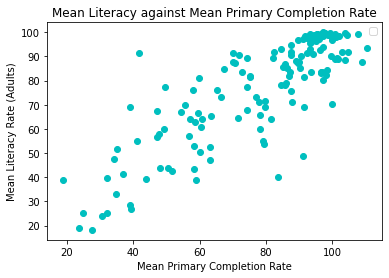

In [79]:
plt.scatter(mean_primary,mean_literacy,color='c')
plot('Mean Primary Completion Rate', 'Mean Literacy Rate (Adults)','Mean Literacy against Mean Primary Completion Rate')

It appears there may be some correlation.

In [80]:
corrprimaryliteracy = np.corrcoef(mean_primary,mean_literacy)
corrprimaryliteracy

array([[1.        , 0.83937012],
       [0.83937012, 1.        ]])

It turns out there is a relatively strong correlation! However, from the graph it is clear there is some spread.
We can compare the correlation with a measure of the spread of the data by calculating the differences between the rates and then the standard deviation of those differences:

In [81]:
literacyminusprimary = mean_primary - mean_literacy
std_l_p = np.std(literacyminusprimary)

In [82]:
std_l_p

12.422349979350038

Here we can see that the standard deviation of the differences between the rates is about 12.4%. This indicates a fairly large spread and reflects the shape of the scatter plot. It shows that a linear relationship may not be properly representative of the distribution, although a strong correlation is present.

SUMMARY OF SECTION TWO.

Conclusion: Primary school completion is a good indicator of adult literacy.

The advantage of studying these metrics is that they are hard data and are measured according to an internationally regulated standard.

Limitations:

1. The primary school competion rate and adult literacy rates were averaged over the entire time the data was taken. Therefore they are means and not necessarily representative of the trends. Some countries may have drastically improved their educational standards over the last 30 years.
2. Many data values were missing from the dataset. Therefore, it was impossible to compare data for a given year. Although this is beyond the scope of this analysis, a way around this might be to compute means for given 5-year bins and repeat the analysis. Bins could be chosen where the dataset is least sparse. 
3. Although the correlation is strong (>0.80), a large minority of the data does not follow a linear relationship. This has not been investigated. A way to begin investigating it would be to break down the data into subcategories, perhaps by country, and rerun the analysis. Behaviour may vary hugely by country.

Thank you for reading this analysis.

___________________________________________________________________________________________________________________________